# MASINSKO UCENJE - PROJEKAT 1 - NADGLEDANO UCENJE (SUPERVISED LEARNING)

## Projekat se bavi klasifikacijom "ruke" u pokeru, na osnovu znaka i vrednosti svake od 5 karata koje igrac poseduje

## 1. Ucitavanje potrebnih biblioteka. Za klasifikaciju je koriscena biblioteka scikit-learn

In [1]:
import numpy as np
import sklearn.metrics
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

## 2. Ucitavanje dataseta

#### Dataset je podeljen u 2 fajla, od kojih je jedan za treniranje, a drugi za testiranje. Fajl za treniranje sadrzi 1000000 redova, svaki red je opisan sa 10 parametara (za svaku od 5 karata vrednost i znak). Jedanaesta kolona prikazuje koja je jacina ruke (0 - Nista u ruci, 1 - Jedan par, 2 - Dva para, 3 - Triling ili tri iste karte, 4 - Strejt ili kenta, 5 - Fles ili svih pet karata su u istom znaku, 6 - Ful (od 5 karata postoji i triling i par), 7 - Poker ili 4 iste karte, 8 - Strejt fles, 9 - Rojal Fles ili Strejt fles sa najjacim kartama.  

#### Dataset za testiranje se sastoji od 25010 redova koji imaju istu strukturu kao i dataset za treniranje

In [2]:
data = pd.read_csv("Masinsko projekat\\poker-hand-testing.data", delimiter=",", header=None)
test_data = pd.read_csv("Masinsko projekat\\poker-hand-training-true.data", delimiter=",", header=None)
print(data)
print(test_data)

        0   1   2   3   4   5   6   7   8   9   10
0        1   1   1  13   2   4   2   3   1  12   0
1        3  12   3   2   3  11   4   5   2   5   1
2        1   9   4   6   1   4   3   2   3   9   1
3        1   4   3  13   2  13   2   1   3   6   1
4        3  10   2   7   1   2   2  11   4   9   0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
999995   3   1   1  12   2   9   4   9   2   6   1
999996   3   3   4   5   2   7   1   4   4   3   1
999997   1  11   4   7   3   9   1  13   2   7   1
999998   3  11   1   8   1   1   3  13   2   8   1
999999   2   5   2   9   4   9   2   3   3   3   2

[1000000 rows x 11 columns]
       0   1   2   3   4   5   6   7   8   9   10
0       1  10   1  11   1  13   1  12   1   1   9
1       2  11   2  13   2  10   2  12   2   1   9
2       3  12   3  11   3  13   3  10   3   1   9
3       4  10   4  11   4   1   4  13   4  12   9
4       4   1   4  13   4  12   4  11   4  10   9
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
25005   3

### Dataset je potrebno konvertovati u numpy niz i u posebne liste je izvuceno X i y

In [3]:
data = np.asarray(data)
test_data = np.asarray(test_data)
X = data[:, 0:10]
y = data[:, 10]
X_test = test_data[:, 0:10]
y_test = test_data[:, 10]
print(X)
print(y)
print(X_test)
print(y_test)

[[ 1  1  1 ...  3  1 12]
 [ 3 12  3 ...  5  2  5]
 [ 1  9  4 ...  2  3  9]
 ...
 [ 1 11  4 ... 13  2  7]
 [ 3 11  1 ... 13  2  8]
 [ 2  5  2 ...  3  3  3]]
[0 1 1 ... 1 1 2]
[[ 1 10  1 ... 12  1  1]
 [ 2 11  2 ... 12  2  1]
 [ 3 12  3 ... 10  3  1]
 ...
 [ 2  1  2 ...  1  4 13]
 [ 2 12  4 ... 12  4  9]
 [ 1  7  3 ...  8  3  7]]
[9 9 9 ... 1 1 1]


### Raspodela klasa u training dataset-u

[5.56898889e-01 4.69442222e-01 5.29133333e-02 2.34677778e-02
 4.31666667e-03 2.21777778e-03 1.58222222e-03 2.55555556e-04
 1.33333333e-05 3.33333333e-06]


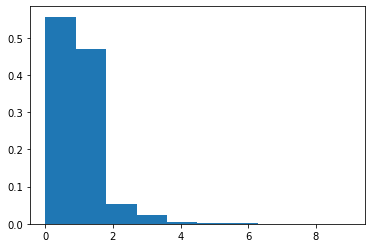

In [4]:
hist, bin_edges = np.histogram(y, density=True)
print(hist)
plt.hist(y, density=True)
plt.show()

### Raspodela klasa u test dataset-u

[5.55022435e-01 4.70878315e-01 5.35785686e-02 2.27908836e-02
 4.13168066e-03 2.39904038e-03 1.59936026e-03 2.66560043e-04
 2.22133369e-04 2.22133369e-04]


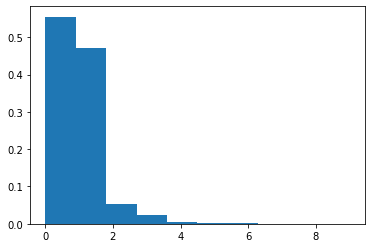

In [5]:
hist, bin_edges = np.histogram(y_test, density=True)
print(hist)
plt.hist(y_test, density=True)
plt.show()

## 3. Pretprocesiranje

### Vrseno je i skaliranje dataseta koriscenjem Standardnog skaliranja (X-mean/std)

In [6]:
scaler = StandardScaler(with_std=True, with_mean=True)
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
print(X_scaled)
print(X_test_scaled)

[[-1.34240194 -1.60227902 -1.34090572 ... -1.06977044 -1.34005473
   1.33974955]
 [ 0.44687924  1.33624777  0.44709493 ... -0.53519234 -0.44635782
  -0.53196211]
 [-1.34240194  0.53483138  1.34109525 ... -1.3370595   0.44733909
   0.53758741]
 ...
 [-1.34240194  1.06910898  1.34109525 ...  1.60312009 -0.44635782
   0.00281265]
 [ 0.44687924  1.06910898 -1.34090572 ...  1.60312009 -0.44635782
   0.27020003]
 [-0.44776135 -0.53372382 -0.4469054  ... -1.06977044  0.44733909
  -1.06673687]]
[[-1.34240194e+00  8.01970176e-01 -1.34090572e+00 ...  1.33583104e+00
  -1.34005473e+00 -1.60151163e+00]
 [-4.47761351e-01  1.06910898e+00 -4.46905397e-01 ...  1.33583104e+00
  -4.46357816e-01 -1.60151163e+00]
 [ 4.46879235e-01  1.33624777e+00  4.47094925e-01 ...  8.01252931e-01
   4.47339095e-01 -1.60151163e+00]
 ...
 [-4.47761351e-01 -1.60227902e+00 -4.46905397e-01 ... -1.60434855e+00
   1.34103601e+00  1.60713693e+00]
 [-4.47761351e-01  1.33624777e+00  1.34109525e+00 ...  1.33583104e+00
   1.34103601

### Takodje je vrseno i skaliranje podataka koriscenjem MinMaxScalera

In [7]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
X_test_minmax = scaler.transform(X_test)
print(X_minmax)
print(X_test_minmax)

[[0.         0.         0.         ... 0.16666667 0.         0.91666667]
 [0.66666667 0.91666667 0.66666667 ... 0.33333333 0.33333333 0.33333333]
 [0.         0.66666667 1.         ... 0.08333333 0.66666667 0.66666667]
 ...
 [0.         0.83333333 1.         ... 1.         0.33333333 0.5       ]
 [0.66666667 0.83333333 0.         ... 1.         0.33333333 0.58333333]
 [0.33333333 0.33333333 0.33333333 ... 0.16666667 0.66666667 0.16666667]]
[[0.         0.75       0.         ... 0.91666667 0.         0.        ]
 [0.33333333 0.83333333 0.33333333 ... 0.91666667 0.33333333 0.        ]
 [0.66666667 0.91666667 0.66666667 ... 0.75       0.66666667 0.        ]
 ...
 [0.33333333 0.         0.33333333 ... 0.         1.         1.        ]
 [0.33333333 0.91666667 1.         ... 0.91666667 1.         0.66666667]
 [0.         0.5        0.66666667 ... 0.58333333 0.66666667 0.5       ]]


## 4. Klasifikacija

### 4.1. Klasifikacija bez pretprocesiranja

#### DecisionTree

In [8]:
classifier = DecisionTreeClassifier(random_state=42)
classifier = classifier.fit(X=X, y=y)
y_predicted = classifier.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74     12493
           1       0.63      0.63      0.63     10599
           2       0.33      0.36      0.34      1206
           3       0.41      0.47      0.44       513
           4       0.29      0.35      0.32        93
           5       0.25      0.31      0.28        54
           6       0.18      0.22      0.20        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.66     25010
   macro avg       0.28      0.31      0.29     25010
weighted avg       0.67      0.66      0.66     25010

[[9201 3042  156   47   11   36    0    0    0    0]
 [2929 6648  677  257   64   12   12    0    0    0]
 [ 123  600  435   35    3    0   10    0    0    0]
 [  31  186   38  242    1    0   14    1    0    0]
 [   7   50    3    0   33   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### RandomForest

In [9]:
classifier = RandomForestClassifier(n_estimators=100)
classifier = classifier.fit(X=X, y=y)
y_predicted = classifier.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85     12493
           1       0.73      0.71      0.72     10599
           2       0.70      0.04      0.08      1206
           3       0.92      0.10      0.17       513
           4       0.33      0.01      0.02        93
           5       0.86      0.33      0.48        54
           6       0.33      0.03      0.05        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.77     25010
   macro avg       0.47      0.21      0.24     25010
weighted avg       0.76      0.77      0.74     25010

[[11450  1043     0     0     0     0     0     0     0     0]
 [ 3018  7565    12     2     2     0     0     0     0     0]
 [   22  1131    53     0     0     0     0     0     0     0]
 [    8   448     6    49     0     0     2     0   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### SGD

In [10]:
classifier = SGDClassifier()
classifier = classifier.fit(X=X, y=y)
y_predicted = classifier.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12493
           1       0.00      0.00      0.00     10599
           2       0.00      0.00      0.00      1206
           3       0.00      0.00      0.00       513
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.50     25010
   macro avg       0.05      0.10      0.07     25010
weighted avg       0.25      0.50      0.33     25010

[[12493     0     0     0     0     0     0     0     0     0]
 [10599     0     0     0     0     0     0     0     0     0]
 [ 1206     0     0     0     0     0     0     0     0     0]
 [  513     0     0     0     0     0     0     0   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### K Nearest Neighbors

In [11]:
classifier = KNeighborsClassifier()
classifier = classifier.fit(X=X, y=y)
y_predicted = classifier.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71     12493
           1       0.59      0.56      0.57     10599
           2       0.38      0.08      0.14      1206
           3       0.31      0.05      0.09       513
           4       0.15      0.02      0.04        93
           5       0.00      0.00      0.00        54
           6       0.50      0.03      0.05        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.63     25010
   macro avg       0.26      0.15      0.16     25010
weighted avg       0.61      0.63      0.61     25010

[[9560 2914   19    0    0    0    0    0    0    0]
 [4470 5981   96   44    8    0    0    0    0    0]
 [ 313  779  100   11    2    0    1    0    0    0]
 [  30  422   34   27    0    0    0    0    0    0]
 [  12   72    5    2    2   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### Naive-Bayes

In [12]:
classifier = GaussianNB()
classifier = classifier.fit(X=X, y=y)
y_predicted = classifier.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12493
           1       0.00      0.00      0.00     10599
           2       0.00      0.00      0.00      1206
           3       0.00      0.00      0.00       513
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.50     25010
   macro avg       0.05      0.10      0.07     25010
weighted avg       0.25      0.50      0.33     25010

[[12493     0     0     0     0     0     0     0     0     0]
 [10599     0     0     0     0     0     0     0     0     0]
 [ 1206     0     0     0     0     0     0     0     0     0]
 [  513     0     0     0     0     0     0     0   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### 4.2. Klasifikacija podataka koji su skalirani Standardnim skaliranjem

#### Decision Tree

In [13]:
classifier = DecisionTreeClassifier(random_state=42)
classifier = classifier.fit(X=X_scaled, y=y)
y_predicted = classifier.predict(X_test_scaled)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74     12493
           1       0.63      0.63      0.63     10599
           2       0.33      0.36      0.34      1206
           3       0.41      0.47      0.44       513
           4       0.30      0.35      0.32        93
           5       0.23      0.31      0.27        54
           6       0.18      0.22      0.20        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.66     25010
   macro avg       0.28      0.31      0.29     25010
weighted avg       0.67      0.66      0.67     25010

[[9201 3031  161   51    9   40    0    0    0    0]
 [2931 6661  672  250   62   11   12    0    0    0]
 [ 120  602  436   35    3    0   10    0    0    0]
 [  29  187   39  242    1    1   13    1    0    0]
 [   7   50    3    0   33   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### Random Forest

In [14]:
classifier = RandomForestClassifier(n_estimators=100)
classifier = classifier.fit(X=X_scaled, y=y)
y_predicted = classifier.predict(X_test_scaled)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85     12493
           1       0.74      0.72      0.73     10599
           2       0.65      0.03      0.06      1206
           3       0.88      0.10      0.18       513
           4       0.33      0.01      0.02        93
           5       0.79      0.20      0.32        54
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.77     25010
   macro avg       0.42      0.20      0.22     25010
weighted avg       0.76      0.77      0.74     25010

[[11477  1016     0     0     0     0     0     0     0     0]
 [ 2930  7656     9     2     2     0     0     0     0     0]
 [   21  1144    41     0     0     0     0     0     0     0]
 [    6   451     4    51     0     0     1     0   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### SGD

In [15]:
classifier = SGDClassifier()
classifier = classifier.fit(X=X_scaled, y=y)
y_predicted = classifier.predict(X_test_scaled)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12493
           1       0.00      0.00      0.00     10599
           2       0.00      0.00      0.00      1206
           3       0.00      0.00      0.00       513
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.50     25010
   macro avg       0.05      0.10      0.07     25010
weighted avg       0.25      0.50      0.33     25010

[[12493     0     0     0     0     0     0     0     0     0]
 [10599     0     0     0     0     0     0     0     0     0]
 [ 1206     0     0     0     0     0     0     0     0     0]
 [  513     0     0     0     0     0     0     0   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### K Nearest Neighbors

In [16]:
classifier = KNeighborsClassifier()
classifier = classifier.fit(X=X_scaled, y=y)
y_predicted = classifier.predict(X_test_scaled)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63     12493
           1       0.50      0.47      0.48     10599
           2       0.21      0.03      0.05      1206
           3       0.22      0.02      0.04       513
           4       0.00      0.00      0.00        93
           5       0.92      0.85      0.88        54
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.54     25010
   macro avg       0.24      0.21      0.21     25010
weighted avg       0.52      0.54      0.52     25010

[[8564 3897   28    3    1    0    0    0    0    0]
 [5538 4947   82   27    3    0    2    0    0    0]
 [ 512  650   34    9    1    0    0    0    0    0]
 [ 136  353   11   12    1    0    0    0    0    0]
 [  25   65    2    1    0   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### Naive-Bayes

In [17]:
classifier = GaussianNB()
classifier = classifier.fit(X=X_scaled, y=y)
y_predicted = classifier.predict(X_test_scaled)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12493
           1       0.00      0.00      0.00     10599
           2       0.00      0.00      0.00      1206
           3       0.00      0.00      0.00       513
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.50     25010
   macro avg       0.05      0.10      0.07     25010
weighted avg       0.25      0.50      0.33     25010

[[12493     0     0     0     0     0     0     0     0     0]
 [10599     0     0     0     0     0     0     0     0     0]
 [ 1206     0     0     0     0     0     0     0     0     0]
 [  513     0     0     0     0     0     0     0   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### 4.3. Klasifikacija podataka skaliranih MinMax skaliranjem

#### Decision Tree

In [18]:
classifier = DecisionTreeClassifier(random_state=42)
classifier = classifier.fit(X=X_minmax, y=y)
y_predicted = classifier.predict(X_test_minmax)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74     12493
           1       0.63      0.63      0.63     10599
           2       0.33      0.36      0.35      1206
           3       0.41      0.48      0.44       513
           4       0.29      0.35      0.32        93
           5       0.24      0.31      0.27        54
           6       0.18      0.22      0.20        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.66     25010
   macro avg       0.28      0.31      0.29     25010
weighted avg       0.67      0.66      0.66     25010

[[9176 3062  158   49   10   37    1    0    0    0]
 [2932 6652  677  251   62   13   12    0    0    0]
 [ 121  599  438   35    3    0   10    0    0    0]
 [  31  186   37  244    1    0   13    1    0    0]
 [   7   50    3    0   33   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### Random Forest

In [19]:
classifier = RandomForestClassifier(n_estimators=100)
classifier = classifier.fit(X=X_minmax, y=y)
y_predicted = classifier.predict(X_test_minmax)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85     12493
           1       0.73      0.71      0.72     10599
           2       0.72      0.04      0.07      1206
           3       0.91      0.10      0.18       513
           4       0.67      0.02      0.04        93
           5       0.88      0.41      0.56        54
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.76     25010
   macro avg       0.47      0.22      0.24     25010
weighted avg       0.76      0.76      0.74     25010

[[11425  1068     0     0     0     0     0     0     0     0]
 [ 3023  7566     7     2     1     0     0     0     0     0]
 [   21  1142    43     0     0     0     0     0     0     0]
 [    6   450     5    50     0     0     2     0   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### SGD

In [20]:
classifier = SGDClassifier()
classifier = classifier.fit(X=X_minmax, y=y)
y_predicted = classifier.predict(X_test_minmax)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12493
           1       0.00      0.00      0.00     10599
           2       0.00      0.00      0.00      1206
           3       0.00      0.00      0.00       513
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.50     25010
   macro avg       0.05      0.10      0.07     25010
weighted avg       0.25      0.50      0.33     25010

[[12493     0     0     0     0     0     0     0     0     0]
 [10599     0     0     0     0     0     0     0     0     0]
 [ 1206     0     0     0     0     0     0     0     0     0]
 [  513     0     0     0     0     0     0     0   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### K Nearest Neighbors

In [21]:
classifier = KNeighborsClassifier()
classifier = classifier.fit(X=X_minmax, y=y)
y_predicted = classifier.predict(X_test_minmax)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.57      0.68      0.62     12493
           1       0.49      0.46      0.48     10599
           2       0.18      0.02      0.04      1206
           3       0.24      0.02      0.04       513
           4       0.00      0.00      0.00        93
           5       0.89      0.93      0.91        54
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.54     25010
   macro avg       0.24      0.21      0.21     25010
weighted avg       0.51      0.54      0.52     25010

[[8506 3954   28    5    0    0    0    0    0    0]
 [5596 4910   69   20    1    0    3    0    0    0]
 [ 528  646   25    7    0    0    0    0    0    0]
 [ 154  337   10   11    1    0    0    0    0    0]
 [  25   65    2    1    0   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### Naive-Bayes

In [22]:
classifier = GaussianNB()
classifier = classifier.fit(X=X_minmax, y=y)
y_predicted = classifier.predict(X_test_minmax)
print(classification_report(y_true=y_test, y_pred=y_predicted))
print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
print(accuracy_score(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12493
           1       0.00      0.00      0.00     10599
           2       0.00      0.00      0.00      1206
           3       0.00      0.00      0.00       513
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.50     25010
   macro avg       0.05      0.10      0.07     25010
weighted avg       0.25      0.50      0.33     25010

[[12493     0     0     0     0     0     0     0     0     0]
 [10599     0     0     0     0     0     0     0     0     0]
 [ 1206     0     0     0     0     0     0     0     0     0]
 [  513     0     0     0     0     0     0     0   

c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cile\pycharmprojects\pokerhandprediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## 5. Zakljucak

#### Moze se zakljuciti da su neki algoritmi bili dosta losi pri klasifikaciji jer su dosta bili povuceni time da najvise ima redova kojima je vrednost 0 ili 1. Sa druge strane, najbolje se pokazao Random Forest koji je sa skaliranim podacima dosao do tacnosti 76.91% - sto je solidno. Takodje, KNN se dobro pokazao jer nije uopste bio povucen problemima koje su imali ostali algoritmi i dostigao najvecu tacnost od 65.66% kod neskaliranih podataka. Dataset nije previse zahvalan za algoritme masinskog ucenja, ali se cini da bi se neuronske mreze dobro pokazale kod ovog dataseta.